In [3]:
%matplotlib inline

In [4]:
%load_ext autoreload

In [ ]:
%conda install -c conda-forge cmocean geopandas xarray geopandas

In [11]:
%autoreload 2

In [12]:
from pathlib import Path
import itertools 

from cycler import cycler

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.cm as mcm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

from matplotlib import rcParams

from scipy.spatial.distance import pdist, squareform

import numpy as np
import pandas as pd
import cmocean
import xarray as xr

import metpy
from metpy.interpolate import interpolate_to_grid

import geopandas as gpd


import intro_plots as ip
from papercolors import colordict as pcd
import topology as tp 

paper_path = Path('../figures/')


rcParams['font.family'] = 'dejavu sans'
rcParams['figure.dpi'] = 200

ModuleNotFoundError: No module named 'cmocean'

In [ ]:
fig, ax = plt.subplots(figsize=(5,1))
ax.bar(ip.airports.keys(), 1, color=[v['color'] for k,v in ip.airports.items()]) 
ax.tick_params(rotation=90)

In [6]:
ny_all = pd.read_csv("nydata.csv", parse_dates=['DATE'])
#[name for name in ny_all['NAME'].unique() if (('AP' in name) or ('INTL' in name))]

In [7]:
ny = ny_all[ny_all['NAME'].isin(ip.ssubset)].copy().fillna(0)

ny['DATES'] = pd.to_datetime(ny['DATE'])

ny['TEMP (°F)'] = ny['TAVG'].apply(lambda x: f"{x:2.2f}")
ny['PRCP (in.)'] = ny['PRCPI'].apply(lambda x: f"{x:1.2f}")    

In [8]:
ny['NAME'].unique()

array(['ALBANY INTL AP', 'BINGHAMTON', 'BUFFALO', 'GLENS FALLS AP',
       'ISLIP-LI MACARTHUR AP', 'JFK INTL AP', 'LAGUARDIA AP',
       'SARANAC LK ADIRONDACK RGNL AP', 'STONYKILL NEW YORK',
       'SYRACUSE HANCOCK INTL AP'], dtype=object)

In [9]:
date = '02-10-2022'
time_series = ny.copy()
time_series['DATE'] = pd.to_datetime(time_series['DATES'])
all_fields = ny[ny['DATE'] == date].set_index('NAME').reset_index()
all_fields

,NAME,LATITUDE,LONGITUDE,DATE,PRCP,TAVG,TAVGF,PRCPI,DATES,TEMP (°F),PRCP (in.)
0,ALBANY INTL AP,42.7472,-73.7992,2022-02-10,5.0,35.0,38.30,0.019685,2022-02-10,35.00,0.02
1,BINGHAMTON,42.1997,-75.9847,2022-02-10,0.0,24.0,36.32,0.000000,2022-02-10,24.00,0.00
2,BUFFALO,42.9489,-78.7367,2022-02-10,8.0,26.0,36.68,0.031496,2022-02-10,26.00,0.03
3,GLENS FALLS AP,43.3386,-73.6103,2022-02-10,8.0,3.0,32.54,0.031496,2022-02-10,3.00,0.03
4,ISLIP-LI MACARTHUR AP,40.7939,-73.1019,2022-02-10,0.0,40.0,39.20,0.000000,2022-02-10,40.00,0.00
5,JFK INTL AP,40.6392,-73.7639,2022-02-10,0.0,51.0,41.18,0.000000,2022-02-10,51.00,0.00
6,LAGUARDIA AP,40.7794,-73.8803,2022-02-10,0.0,63.0,43.34,0.000000,2022-02-10,63.00,0.00
7,SARANAC LK ADIRONDACK RGNL AP,44.3928,-74.2028,2022-02-10,10.0,0.0,0.00,0.039370,2022-02-10,0.00,0.04
8,STONYKILL NEW YORK,41.5000,-73.9000,2022-02-10,0.0,29.0,37.22,0.000000,2022-02-10,29.00,0.00
9,SYRACUSE HANCOCK INTL AP,43.1111,-76.1039,2022-02-10,8.0,53.0,41.54,0.031496,2022-02-10,53.00,0.03


In [10]:
nyg = ny_all[ny_all['DATE']==date]
nygeo = gpd.GeoDataFrame(nyg, geometry=gpd.points_from_xy(nyg['LONGITUDE'], nyg['LATITUDE']), crs='EPSG:4269')
gdf = gpd.read_file('s_22mr22.zip')
nyshp = gdf[gdf['STATE'].str.match('NY')]

In [11]:
px, py, prcp = interpolate_to_grid(nygeo['LONGITUDE'].values, nygeo['LATITUDE'].values, nygeo['PRCPI'].values, 
                                   interp_type='barnes', minimum_neighbors=3, 
                                         search_radius=.25, hres=.025, gamma=1)

In [12]:
sample = all_fields[['NAME', 'TEMP (°F)','PRCP (in.)']]

In [13]:
timeseries = {k:v.set_index('DATE') for k, v in time_series[['NAME','DATE', 'PRCPI']].groupby('NAME')}

In [14]:
all_fields[['NAME', 'LATITUDE', 'LONGITUDE', 'TAVG']]

,NAME,LATITUDE,LONGITUDE,TAVG
0,ALBANY INTL AP,42.7472,-73.7992,35.0
1,BINGHAMTON,42.1997,-75.9847,24.0
2,BUFFALO,42.9489,-78.7367,26.0
3,GLENS FALLS AP,43.3386,-73.6103,3.0
4,ISLIP-LI MACARTHUR AP,40.7939,-73.1019,40.0
5,JFK INTL AP,40.6392,-73.7639,51.0
6,LAGUARDIA AP,40.7794,-73.8803,63.0
7,SARANAC LK ADIRONDACK RGNL AP,44.3928,-74.2028,0.0
8,STONYKILL NEW YORK,41.5000,-73.9000,29.0
9,SYRACUSE HANCOCK INTL AP,43.1111,-76.1039,53.0


In [15]:
mcolors.to_hex(cmocean.cm.rain(0))

'#eeedf3'

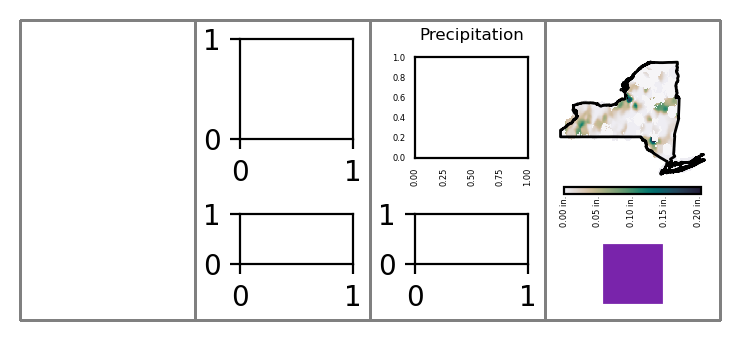

In [86]:
fig = plt.figure(figsize=(3.5, 1.5), linewidth=1, layout='compressed')
figs = fig.subfigures(1,4, wspace=0)
for subfig in figs:
    #fig0.frameon=True
    subfig.set_edgecolor('gray')
    subfig.set_linewidth(.5)


axf0 = figs[1].subplot_mosaic([['scatter'], ['k0']], gridspec_kw={'height_ratios':[2,1]})
#tp.make_table(axf0['table'], axf0['k0'], sample)

axf1 = figs[2].subplot_mosaic([['timeseries'],['k1']], gridspec_kw={'height_ratios':[2,1]})
#tp.make_timeseries(axf1['timeseries'], axf1['k1'], timeseries)
axf1['timeseries'].set_title('Precipitation', fontsize=6)
axf1['timeseries'].tick_params(labelsize=3, length=0
                              )
axf1['timeseries'].xaxis.set_tick_params(rotation=90)
axf1['timeseries'].yaxis.set_major_formatter("{:0.1f}".format)

axf2 = figs[3].subplot_mosaic([['map'], ['k2']], gridspec_kw={'height_ratios':[2,1]})

cmap = cmocean.cm.rain
nyshp.plot(ax=axf2['map'],  facecolor='#f6f5f7', edgecolor='none')
im = axf2['map'].pcolormesh(px, py, prcp, cmap=cmap)
nyshp.plot(ax=axf2['map'],  facecolor='none', edgecolor='k')
cb = fig.colorbar(im, ax=axf2['map'], fraction=.045,orientation='horizontal',
                  location='bottom')
#axf2['map'].set_title("Precipitation", fontsize=6)
cb.ax.tick_params(labelsize=3, length=0, pad=0.5,rotation=90)
cb.ax.xaxis.set_major_formatter("{:0.2f} in.".format)
axf2['map'].axis('off')
           
           
axf2['k2'].add_patch(mpatches.Rectangle((.25/2,.25-.25/2), .75, .75, color=pcd['base']))
axf2['k2'].set_aspect('equal')
axf2['k2'].axis('off')
fig.savefig(paper_path/'k_different_types.png')

In [43]:
cb.ax.tick_params?

Signature: cb.ax.tick_params(axis='both', **kwargs)
Docstring:
Change the appearance of ticks, tick labels, and gridlines.

Tick properties that are not explicitly set using the keyword
arguments remain unchanged unless *reset* is True. For the current
style settings, see `.Axis.get_tick_params`.

Parameters
----------
axis : {'x', 'y', 'both'}, default: 'both'
    The axis to which the parameters are applied.
which : {'major', 'minor', 'both'}, default: 'major'
    The group of ticks to which the parameters are applied.
reset : bool, default: False
    Whether to reset the ticks to defaults before updating them.

Other Parameters
----------------
direction : {'in', 'out', 'inout'}
    Puts ticks inside the Axes, outside the Axes, or both.
length : float
    Tick length in points.
width : float
    Tick width in points.
color : color
    Tick color.
pad : float
    Distance in points between tick and label.
labelsize : float or str
    Tick label font size in points or as a string (e.g